In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
train = pd.read_csv(r'C:\Users\jhaar\Downloads\healthcare\train_data.csv')
test = pd.read_csv(r'C:\Users\jhaar\Downloads\healthcare\test_data.csv')
dictionary = pd.read_csv(r'C:\Users\jhaar\Downloads\healthcare\train_data_dictionary.csv')
sample = pd.read_csv(r'C:\Users\jhaar\Downloads\healthcare\sample_sub.csv')

In [4]:
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


#Hypothesis:
The following features may have relevance with the Length of Stay of a patient

Department: Relates to the type of disease
Type of Admission: Relates to patients' reason of admission to the hospital
Severity of Illness: Relates to the curability of disease
Age: Relates to the curability of disease
1. Exploratory Data Analysis
What question(s) are you trying to solve?
What kind of data do we have and how do we treat different types?
What's missing from the data and how do you deal with it?
Where are the outliers and why should you care about them?
How can you add, change or remove features to get more out of your data?

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [12]:
train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [13]:
train.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [14]:
train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


<AxesSubplot:>

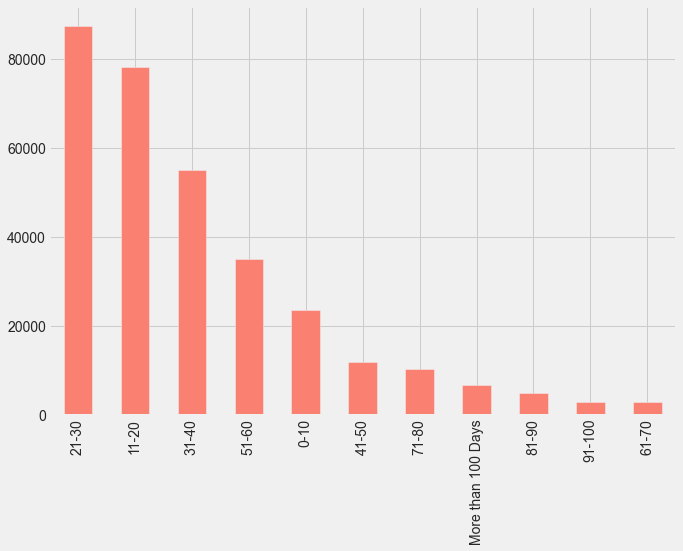

In [15]:
# Distribution of target feature
plt.figure(figsize=(10,7))
train.Stay.value_counts().plot(kind="bar", color = ['Salmon'])

Insight: Most of the patients stay in hospital for 21-30 days, followed by 11-20, 31-40

In [16]:
# Check for unique values in every column
for features in train.columns:
    print('Unique Values for {}'.format(features))
    print(train[features].unique())
    print('======================================')
    print()

Unique Values for case_id
[     1      2      3 ... 318436 318437 318438]

Unique Values for Hospital_code
[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]

Unique Values for Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']

Unique Values for City_Code_Hospital
[ 3  5  1  2  6  9 10  4 11  7 13]

Unique Values for Hospital_region_code
['Z' 'X' 'Y']

Unique Values for Available Extra Rooms in Hospital
[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]

Unique Values for Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']

Unique Values for Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']

Unique Values for Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']

Unique Values for Bed Grade
[ 2.  3.  4.  1. nan]

Unique Values for patientid
[ 31397  63418   8088 ... 125235  91081  21641]

Unique Values for City_Code_Patient
[ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. nan 25. 15. 12. 10. 28. 24. 23.
 20. 11. 13. 21. 18. 16. 26. 

#Insights:#

Categorical features which need to be encoded:
Hospital_region_code
Department
Ward_Type
Admission
Illness
Bins (range) which need to be encoded:
Age
Stay (Target)

In [18]:
# Check for null values
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

Bed Grade and City_Code_Patient features have null values to be filled.

But do we need them?

# 2. Data Processing & Feature engineering

In [19]:
train = train.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)
test = test.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)

In [20]:
# Combine test and train dataset for processing
combined = [train, test]

2a Encoding categorical features

In [21]:
from sklearn.preprocessing import LabelEncoder

for dataset in combined:
    label = LabelEncoder()
    dataset['Department'] = label.fit_transform(dataset['Department'])

In [22]:
combined[1].Department.unique()

array([2, 1, 0, 3, 4])

In [23]:
# Ward type
for dataset in combined:
    label = LabelEncoder()
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

In [24]:
combined[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,3,3,2,5,0,0,2,51-60,4911.0,0-10
1,2,2,2,5,2,3,3,5,1,0,2,51-60,5954.0,41-50
2,3,10,4,1,2,1,3,4,1,0,2,51-60,4745.0,31-40
3,4,26,1,2,2,3,2,3,1,0,2,51-60,7272.0,41-50
4,5,26,1,2,2,3,3,3,1,0,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,3,3,1,5,0,2,3,41-50,4144.0,11-20
318434,318435,24,0,1,2,1,1,4,2,2,4,81-90,6699.0,31-40
318435,318436,7,0,4,3,2,2,5,0,1,3,71-80,4235.0,11-20
318436,318437,11,1,2,3,1,1,3,1,1,5,11-20,3761.0,11-20


2b Binning features

In [25]:
combined[1]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,2,3,3,2,3,0,0,2,2,71-80,3095.0
1,318440,29,0,4,2,2,3,5,1,2,4,71-80,4018.0
2,318441,26,1,2,3,2,1,3,0,2,3,71-80,4492.0
3,318442,6,0,6,3,2,1,5,1,2,3,71-80,4173.0
4,318443,28,1,11,2,2,2,5,1,2,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,1,2,4,1,1,3,0,1,4,41-50,6313.0
137053,455492,25,4,1,2,3,2,4,0,2,2,0-10,3510.0
137054,455493,30,2,3,2,1,2,0,2,1,2,0-10,7190.0
137055,455494,5,0,1,2,1,2,4,1,1,2,41-50,5435.0


<AxesSubplot:>

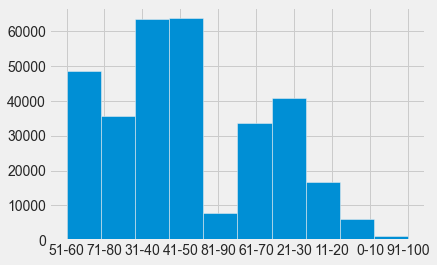

In [26]:
# Check age distribution
combined[0].Age.hist()

In [27]:
combined[0].Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [28]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [29]:
for dataset in combined:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())

In [31]:
combined[0].Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [32]:
stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}

In [33]:
combined[0]['Stay'] = combined[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

<AxesSubplot:>

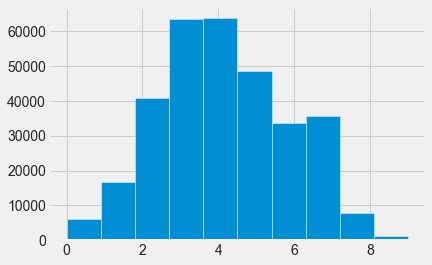

In [34]:
combined[0].Age.hist()

In [35]:
for dataset in combined:
    print(dataset.shape)

(318438, 14)
(137057, 13)


In [36]:
combined[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  int32  
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Available Extra Rooms in Hospital  137057 non-null  int64  
 5   Department                         137057 non-null  int32  
 6   Ward_Type                          137057 non-null  int32  
 7   Ward_Facility_Code                 137057 non-null  int32  
 8   Type of Admission                  137057 non-null  int32  
 9   Severity of Illness                137057 non-null  int32  
 10  Visitors with Patient              137057 non-null  int64  
 11  Age                                1370

# 2c. Scaling numerical data

In [37]:
columns_list = ['Type of Admission', 'Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']len(columns_list)

In [38]:
len(columns_list)

4

In [39]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

for dataset in combined:
    dataset[columns_list]= ss.fit_transform(dataset[columns_list].values)

In [40]:
combined[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,-0.169177,3,2,5,-1.136165,0,-0.727923,5,0.027835,0
1,2,2,2,5,-1.025217,3,3,5,0.315306,0,-0.727923,5,0.987556,4
2,3,10,4,1,-1.025217,1,3,4,0.315306,0,-0.727923,5,-0.124910,3
3,4,26,1,2,-1.025217,3,2,3,0.315306,0,-0.727923,5,2.200319,4
4,5,26,1,2,-1.025217,3,3,3,0.315306,0,-0.727923,5,0.623175,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,-0.169177,3,1,5,-1.136165,2,-0.161049,4,-0.677923,1
318434,318435,24,0,1,-1.025217,1,1,4,1.766778,2,0.405826,8,1.673071,3
318435,318436,7,0,4,-0.169177,2,2,5,-1.136165,1,-0.161049,7,-0.594189,1
318436,318437,11,1,2,-0.169177,1,1,3,0.315306,1,0.972701,1,-1.030342,1


<AxesSubplot:>

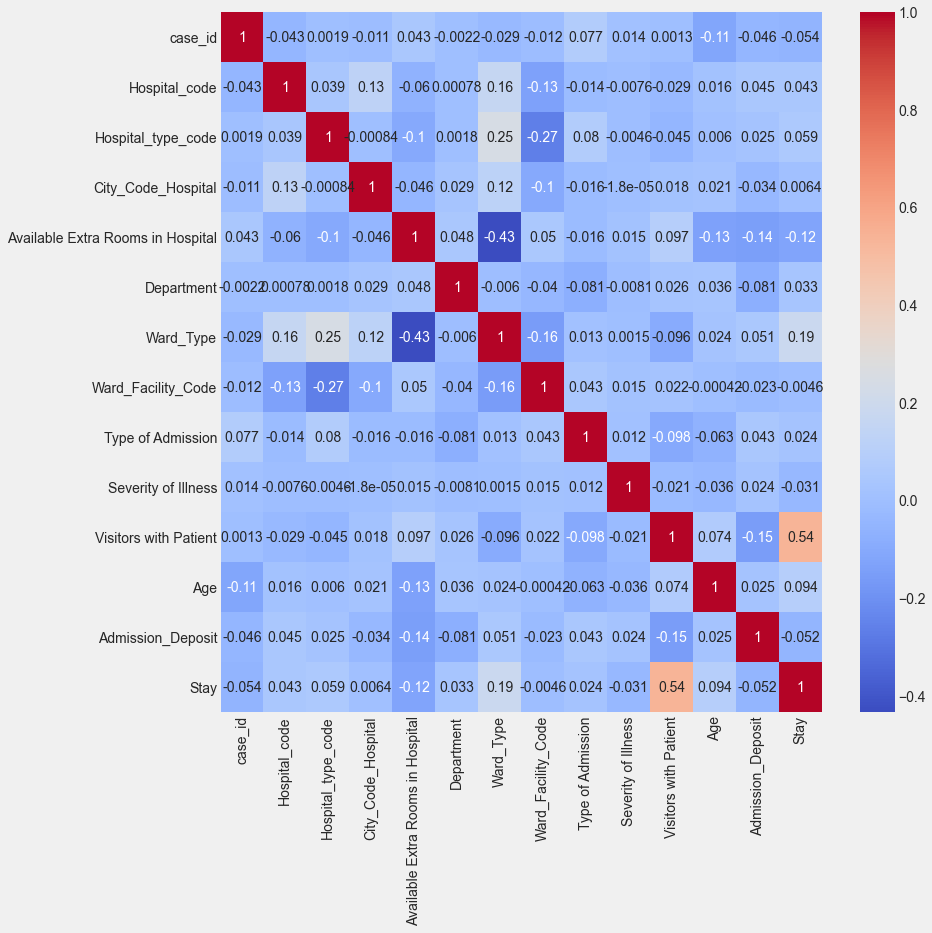

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(combined[0].corr(), annot=True, cmap='coolwarm')

# 3. Data Modelling

In [42]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
train = combined[0]
test = combined[1]

In [44]:
sample

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [45]:
X_train = train.drop(['case_id', 'Stay'], axis=1)
Y_train = train["Stay"]
X_test  = test.drop("case_id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((318438, 12), (318438,), (137057, 12))

In [46]:
sample.shape

(137057, 2)

In [47]:
X_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit'],
      dtype='object')

In [48]:
Y_train

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [49]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

58.09

In [50]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.71

In [51]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.71

<AxesSubplot:>

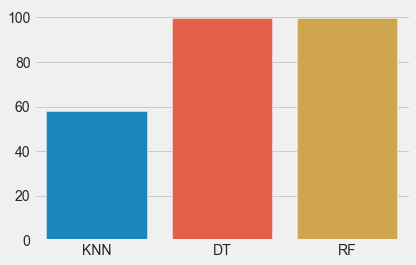

In [52]:
sns.barplot(x= ['KNN','DT','RF'],y= [acc_knn, acc_decision_tree,acc_random_forest])

# 4. Submission

In [53]:
sample

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [54]:
submission = pd.DataFrame({
        "case_id": test["case_id"],
        "Stay": Y_pred
})

In [55]:
submission['Stay'] = submission['Stay'].replace(stay_dict.values(), stay_dict.keys())

In [56]:
submission.to_csv('submission.csv', index = False)

In [57]:
sample

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10
